In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

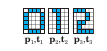

# Hebb Rule and Autoassociative Memory for Digit Recognition

In this notebook, we will use the **Hebb rule** to solve a simplified **pattern recognition problem** using a special type of **associative memory** called **autoassociative memory**. 

## Autoassociative Memory Overview

An autoassociative memory stores patterns such that the desired output vector is equal to the input vector, i.e., 

$$ t_q = p_q $$

We aim to store a set of patterns and then recall these patterns even when the input is corrupted. The patterns we want to store are the digits {0, 1, 2} displayed in a **6x5 grid**. These digits will be converted into vectors, which will become the **prototype patterns** for our network.

Each white square in the grid will be represented by `-1` and each dark square will be represented by `1`. The input vectors are created by scanning each **6x5 grid** one column at a time.

### Prototype Patterns

The prototype patterns correspond to the digits as follows:

- **Digit 0**: 

$$ p_1 = \begin{bmatrix} 
-1 & 1 & 1 & 1 & 1 & -1 & 1 & -1 & -1 & -1 & -1 & 1 & 1 & -1 & \ldots & 1 & -1 
\end{bmatrix} $$

- **Digit 1**: 

$$ p_2 = \begin{bmatrix} 
... 
\end{bmatrix} $$

- **Digit 2**: 

$$ p_3 = \begin{bmatrix} 
... 
\end{bmatrix} $$

### Weight Matrix Computation

Using the **Hebb rule**, the weight matrix for the autoassociative memory is computed as follows:

$$ W = p_1 p_1^T + p_2 p_2^T + p_3 p_3^T $$

(Note that in autoassociative memory, $p_q$ replaces $t_q$ in the Hebb rule equation.)

## Symmetrical Hard Limit Transfer Function

To ensure the output elements only take on values of `-1` or `1`, we modify the **linear transfer function** to a **symmetrical hard limit transfer function**.

The resulting network structure is shown below:

- **Input Vector**: $p_n$
- **Weight Matrix**: $W$ (size $30 \times 30$)
- **Output Vector**: $a = \text{hardlims}(Wp)$

This is represented as:

$$ a = \text{hardlims}(Wp) $$

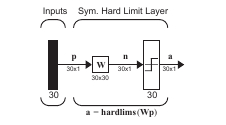

Figure.2 Autoassociative Network for Digit Recognition

## Pattern Recovery Tests

### Test 1: Recovery of 50% Occluded Patterns

In the first test, we provide the network with a prototype pattern where the lower half is occluded (hidden). The network is able to correctly recover the pattern, as shown in the figure below.

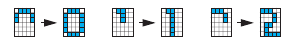

Figure.3 Recovery of 50% Occluded Patterns

### Test 2: Recovery with Two-Thirds Occlusion

In the second test, we remove the lower two-thirds of each pattern. In this case, only the digit "1" is recovered correctly, while the other two patterns result in outputs that do not match any prototype pattern.

This behavior is common in **associative memories**, where the network may produce **spurious patterns** that do not correspond to any of the stored patterns when given highly corrupted input.

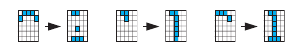

  Figure.4 Recovery of 67% Occluded Patterns
---

In later sections, we will explore methods to minimize the number of spurious patterns. This topic will be revisited in **Chapter 18**, where we discuss **recurrent associative memories**.



In our final test we will present the autoassociative network with noisy versions of the prototype pattern. To create the noisy patterns we will randomly change seven elements of each pattern. The results are shown in Figure.5. For these examples all of the patterns were correctly recovered.




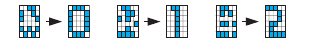

Figure.5 Recovery of Noisy Patterns

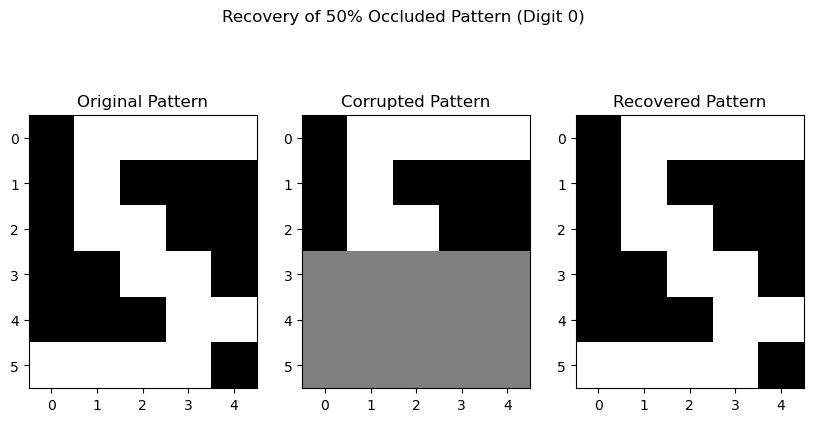

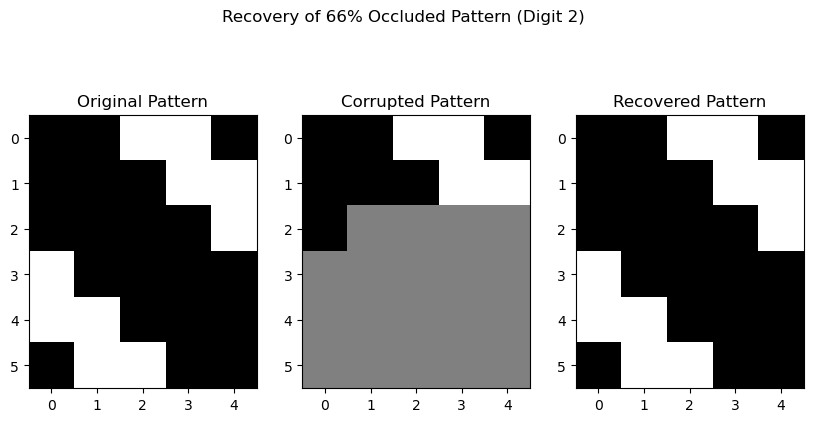

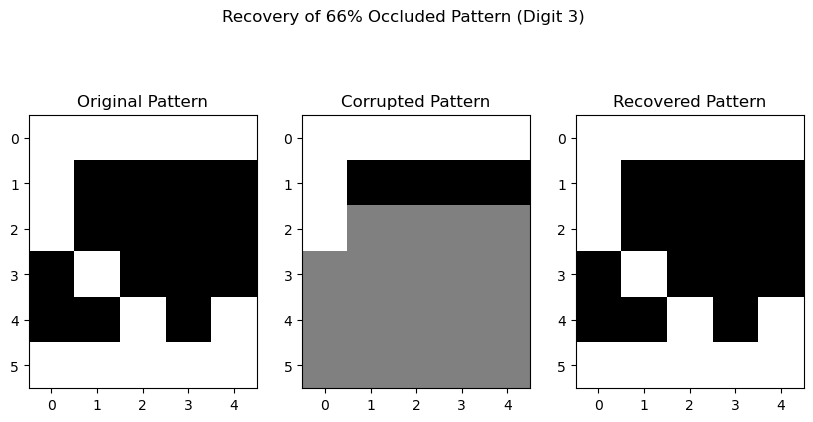

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the symmetrical hard limit transfer function
def hardlims(x):
    return np.where(x >= 0, 1, -1)

# Define the patterns for digits 0, 1, and 2 as 30x1 vectors (6x5 grid flattened)
p1 = np.array([-1,  1,  1,  1,  1, -1,
                1, -1, -1, -1, -1,  1,
                1, -1, -1, -1, -1,  1,
                1, -1, -1, -1, -1,  1,
                1,  1,  1,  1,  1, -1])

p2 = np.array([-1, -1,  1,  1, -1, -1,
                -1, -1,  1,  1, -1, -1,
                -1, -1,  1,  1, -1, -1,
                -1, -1,  1,  1, -1, -1,
                -1, -1,  1,  1, -1, -1])

p3 = np.array([1,  1,  1,  1,  1,  1,
               -1, -1, -1, -1,  1, -1,
                -1, -1, -1, -1,  1, -1,
                -1, -1, -1, -1,  1, -1,
                1,  1,  1,  1,  1,  1])

# Stack the prototype patterns together
patterns = np.array([p1, p2, p3])

# Initialize the weight matrix using the Hebb rule: W = sum(p_i * p_i^T)
n_patterns, vector_length = patterns.shape
W = np.zeros((vector_length, vector_length))

for i in range(n_patterns):
    W += np.outer(patterns[i], patterns[i])

# Test the autoassociative network by providing partially occluded patterns
# Occlude the lower half of the input pattern (set to zero)
def occlude_pattern(pattern, occlusion_fraction=0.5):
    n_occlude = int(occlusion_fraction * len(pattern))
    corrupted_pattern = pattern.copy()
    corrupted_pattern[-n_occlude:] = 0  # Occlude lower part
    return corrupted_pattern

# Visualize the recovery for partially occluded patterns
def visualize_recovery(original, corrupted, recovered, title):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(original.reshape(6, 5), cmap='gray')
    axes[0].set_title('Original Pattern')
    axes[1].imshow(corrupted.reshape(6, 5), cmap='gray')
    axes[1].set_title('Corrupted Pattern')
    axes[2].imshow(recovered.reshape(6, 5), cmap='gray')
    axes[2].set_title('Recovered Pattern')
    plt.suptitle(title)
    plt.show()

# Test recovery of the pattern for digit "0"
input_pattern = p1
corrupted_pattern = occlude_pattern(input_pattern, occlusion_fraction=0.5)
recovered_pattern = hardlims(np.dot(W, corrupted_pattern))

# Visualize the recovery
visualize_recovery(input_pattern, corrupted_pattern, recovered_pattern, "Recovery of 50% Occluded Pattern (Digit 0)")

# Test recovery for digit "1" and digit "2"
for i, pattern in enumerate([p2, p3], start=2):
    corrupted_pattern = occlude_pattern(pattern, occlusion_fraction=0.66)
    recovered_pattern = hardlims(np.dot(W, corrupted_pattern))
    visualize_recovery(pattern, corrupted_pattern, recovered_pattern, f"Recovery of 66% Occluded Pattern (Digit {i})")


## Variations of Hebbian Learning

Hebbian learning has several variations that address some of the limitations of the basic rule. Many learning laws discussed in later chapters have a relationship with the **Hebb rule**. One of the key problems with the basic Hebb rule is that the weight matrix can grow excessively large if there are too many prototype patterns in the training set.

### Basic Hebb Rule (Recap)

The basic Hebb rule updates the weight matrix as follows:

$$
W_{\text{new}} = W_{\text{old}} + t_q p_q^T
\tag{7.43}
$$

### Learning Rate

To limit the amount of change in the weight matrix, we introduce a **learning rate** parameter, $\alpha$. When $\alpha$ is less than 1, the weight update rule becomes:

$$
W_{\text{new}} = W_{\text{old}} + \alpha t_q p_q^T
\tag{7.44}
$$

This slows down the growth of the weight matrix by adjusting the magnitude of each update.

### Decay Term (Smoothing Filter)

Another variation introduces a **decay term**, $\gamma$, which allows the learning rule to behave like a smoothing filter. This makes the weight matrix remember recent inputs more clearly while reducing the influence of older inputs. The updated rule with decay is:

$$
W_{\text{new}} = W_{\text{old}} + \alpha t_q p_q^T - \gamma W_{\text{old}} = (1 - \gamma)W_{\text{old}} + \alpha t_q p_q^T
\tag{7.45}
$$

- $\gamma$ is a positive constant less than 1.
- As $\gamma \to 0$, the rule approaches the standard Hebb rule.
- As $\gamma \to 1$, the rule forgets old inputs quickly and remembers only the most recent patterns.

This variation prevents the weight matrix from growing indefinitely.

### Delta Rule (Widrow-Hoff Algorithm)

By replacing the desired output $t_q$ with the difference between the desired output and the actual output, we arrive at another important learning rule known as the **Delta Rule** or the **Widrow-Hoff algorithm**:

$$
W_{\text{new}} = W_{\text{old}} + \alpha \left( t_q - a_q \right)p_q^T
\tag{7.46}
$$

- This rule minimizes the **mean squared error** (see Chapter 10).
- It updates the weights sequentially after each input pattern, allowing the model to adapt to changes in the environment.

The delta rule shares the same goal as the **pseudoinverse rule**, which minimizes the sum of squared errors, but it differs in that it updates weights continuously, rather than computing them all at once.

### Unsupervised Hebb Rule

In the **unsupervised** form of Hebbian learning, the actual output of the network $a_q$ is used instead of the desired output $t_q$. This unsupervised Hebb rule is described as:

$$
W_{\text{new}} = W_{\text{old}} + \alpha a_q p_q^T
\tag{7.47}
$$

- Here, $a_q$ is the output of the network when $p_q$ is the input.
- This version of the Hebb rule does not require knowledge of the desired output, making it more aligned with Hebb’s original postulate.

The **unsupervised Hebb rule** will be discussed in more detail in **Chapter 13**.

---

In conclusion, these variations on the basic Hebb rule—such as the introduction of learning rates, decay terms, and the delta rule—help improve the performance and stability of the learning process. Many of these principles will be revisited in subsequent chapters when discussing other learning algorithms.


In [2]:
import numpy as np

# Symmetrical Hard Limit Transfer Function
def hardlims(x):
    return np.where(x >= 0, 1, -1)

# Hebb Rule with Learning Rate
def hebb_rule(W_old, p, t, alpha=1.0):
    """ Implements the Hebb rule with a learning rate alpha """
    return W_old + alpha * np.outer(t, p)

# Hebb Rule with Decay
def hebb_rule_with_decay(W_old, p, t, alpha=1.0, gamma=0.0):
    """ Implements the Hebb rule with learning rate alpha and decay gamma """
    return (1 - gamma) * W_old + alpha * np.outer(t, p)

# Delta Rule (Widrow-Hoff)
def delta_rule(W_old, p, t, a, alpha=1.0):
    """ Implements the delta rule (Widrow-Hoff rule) """
    return W_old + alpha * np.outer(t - a, p)

# Unsupervised Hebb Rule
def unsupervised_hebb_rule(W_old, p, a, alpha=1.0):
    """ Implements the unsupervised Hebb rule where output a is used instead of desired output t """
    return W_old + alpha * np.outer(a, p)

# Example patterns for digits (simplified)
p1 = np.array([-1, 1, 1, -1])  # Simplified pattern 1
p2 = np.array([1, -1, 1, -1])  # Simplified pattern 2
p3 = np.array([1, 1, -1, -1])  # Simplified pattern 3

# Desired outputs for the patterns (supervised)
t1 = np.array([-1, 1, 1, -1])  # Target for p1
t2 = np.array([1, -1, 1, -1])  # Target for p2
t3 = np.array([1, 1, -1, -1])  # Target for p3

# Initialize weight matrix W to zero
W = np.zeros((4, 4))

# Apply Hebb rule with learning rate (alpha)
alpha = 0.5
W = hebb_rule(W, p1, t1, alpha)
W = hebb_rule(W, p2, t2, alpha)
W = hebb_rule(W, p3, t3, alpha)

print("Hebb Rule with Learning Rate:")
print(W)

# Apply Hebb rule with decay (gamma)
gamma = 0.1
W_decay = np.zeros((4, 4))
W_decay = hebb_rule_with_decay(W_decay, p1, t1, alpha, gamma)
W_decay = hebb_rule_with_decay(W_decay, p2, t2, alpha, gamma)
W_decay = hebb_rule_with_decay(W_decay, p3, t3, alpha, gamma)

print("\nHebb Rule with Decay:")
print(W_decay)

# Delta rule example (supervised learning)
W_delta = np.zeros((4, 4))
a1 = hardlims(np.dot(W_delta, p1))  # Initial output for p1
a2 = hardlims(np.dot(W_delta, p2))  # Initial output for p2
a3 = hardlims(np.dot(W_delta, p3))  # Initial output for p3

W_delta = delta_rule(W_delta, p1, t1, a1, alpha)
W_delta = delta_rule(W_delta, p2, t2, a2, alpha)
W_delta = delta_rule(W_delta, p3, t3, a3, alpha)

print("\nDelta Rule (Widrow-Hoff):")
print(W_delta)

# Unsupervised Hebb rule example
W_unsupervised = np.zeros((4, 4))
a1 = hardlims(np.dot(W_unsupervised, p1))  # Actual output for p1
a2 = hardlims(np.dot(W_unsupervised, p2))  # Actual output for p2
a3 = hardlims(np.dot(W_unsupervised, p3))  # Actual output for p3

W_unsupervised = unsupervised_hebb_rule(W_unsupervised, p1, a1, alpha)
W_unsupervised = unsupervised_hebb_rule(W_unsupervised, p2, a2, alpha)
W_unsupervised = unsupervised_hebb_rule(W_unsupervised, p3, a3, alpha)

print("\nUnsupervised Hebb Rule:")
print(W_unsupervised)


Hebb Rule with Learning Rate:
[[ 1.5 -0.5 -0.5 -0.5]
 [-0.5  1.5 -0.5 -0.5]
 [-0.5 -0.5  1.5 -0.5]
 [-0.5 -0.5 -0.5  1.5]]

Hebb Rule with Decay:
[[ 1.355 -0.355 -0.455 -0.545]
 [-0.355  1.355 -0.545 -0.455]
 [-0.455 -0.545  1.355 -0.355]
 [-0.545 -0.455 -0.355  1.355]]

Delta Rule (Widrow-Hoff):
[[ 1. -1. -1.  1.]
 [-1.  1. -1.  1.]
 [-1. -1.  1.  1.]
 [-1. -1. -1.  3.]]

Unsupervised Hebb Rule:
[[ 0.5  0.5  0.5 -1.5]
 [ 0.5  0.5  0.5 -1.5]
 [ 0.5  0.5  0.5 -1.5]
 [ 0.5  0.5  0.5 -1.5]]


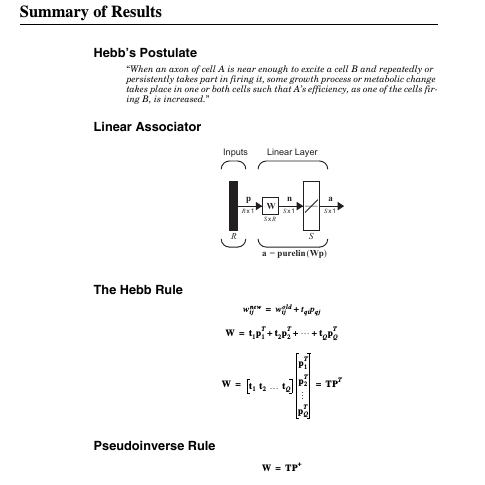
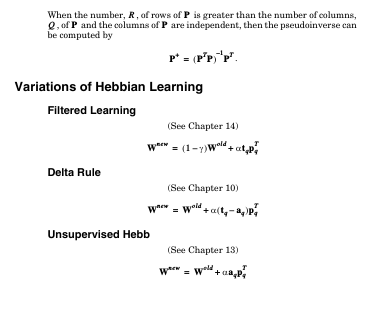